In [63]:
import tensorflow as tf
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [64]:
data = pd.read_csv("E:/Hackathan Materials/Dataset/dataset.csv")

In [65]:
data.shape

(101, 26)

In [66]:
data.ndim

2

In [67]:
data.head()

,Observation,NMRK2,MYH7B,MYL12A,MYL2,PRG4,CA14,CASQ2,MYH8,COQ10A,...,CNNM4,ACOT11,ANKRD2,MYOZ2,CCR3,KLHL34,MYL6B,CHRNG,COLQ,Age
0,GSM2813727_ER01_S1_NBR_1_B05.rma-gene-full.chp...,-1.200135,-3.619689,-2.572716,-3.060903,-4.954960,-4.185165,-2.957674,-5.626698,-3.799027,...,-2.291814,-4.560831,-4.101038,-2.804252,-5.378016,-4.293191,-3.049944,-4.678245,-1.500795,30
1,GSM2813728_ER02_S1_NBR_2_A07.rma-gene-full.chp...,-1.968994,-3.903687,-2.788963,-3.108632,-4.558801,-4.945145,-3.165976,-5.603162,-3.858062,...,-2.580352,-5.088259,-4.487406,-3.042286,-6.614214,-4.581436,-3.659998,-4.692073,-1.910758,29
2,GSM2813729_ER03_S2_NBR_1_C07.rma-gene-full.chp...,-1.684898,-3.548174,-2.516009,-3.043248,-4.748317,-4.540110,-2.898011,-4.600830,-3.783796,...,-2.223710,-4.734622,-4.008674,-2.757527,-4.863443,-4.173351,-2.746038,-4.845878,-1.355824,30
3,GSM2813730_ER04_S2_NBR_2_E05.rma-gene-full.chp...,-1.935442,-4.310112,-2.913646,-3.202091,-4.405045,-5.343365,-3.169684,-4.051258,-4.121806,...,-2.659686,-5.806058,-4.376045,-3.165185,-6.216622,-4.464892,-3.566889,-4.635311,-1.890636,29
4,GSM2813731_ER05_S3_NBR_1_H07.rma-gene-full.chp...,-1.447648,-4.120810,-2.739432,-3.141799,-5.860048,-4.674879,-3.069282,-6.160380,-3.859836,...,-2.342829,-4.769898,-4.596035,-3.021196,-5.635174,-4.191763,-3.322963,-4.817814,-1.550441,30


In [68]:
data.sample(10)

,Observation,NMRK2,MYH7B,MYL12A,MYL2,PRG4,CA14,CASQ2,MYH8,COQ10A,...,CNNM4,ACOT11,ANKRD2,MYOZ2,CCR3,KLHL34,MYL6B,CHRNG,COLQ,Age
11,GSM2813738_ER12_S6_NBR_2_A09.rma-gene-full.chp...,-1.671026,-4.017486,-2.592125,-3.067262,-4.677570,-5.473245,-2.875123,-4.411101,-4.057306,...,-2.561839,-4.693400,-4.238541,-2.873005,-6.744798,-4.814270,-3.083497,-4.104797,-1.968639,27
99,SRR13388783,-0.796923,-0.623430,-1.845968,-1.720656,-10.238214,-11.351558,-6.472767,-10.301791,-5.997103,...,-10.880072,-8.709334,-6.958909,-4.503970,-10.694150,-12.206934,-6.402120,-12.401518,-10.463484,70
6,GSM2813733_ER07_S4_NBR_1_G05.rma-gene-full.chp...,-1.348638,-3.624427,-2.544084,-3.076211,-5.169200,-4.491657,-2.954471,-5.374779,-3.829980,...,-2.246760,-5.079381,-4.000707,-2.837381,-4.838921,-4.360035,-2.959948,-4.853628,-1.513047,27
0,GSM2813727_ER01_S1_NBR_1_B05.rma-gene-full.chp...,-1.200135,-3.619689,-2.572716,-3.060903,-4.954960,-4.185165,-2.957674,-5.626698,-3.799027,...,-2.291814,-4.560831,-4.101038,-2.804252,-5.378016,-4.293191,-3.049944,-4.678245,-1.500795,30
17,GSM2813744_ER18_S11_NBR_2_C09.rma-gene-full.ch...,-1.894569,-3.947542,-2.739432,-3.162071,-4.708856,-4.923558,-3.234237,-4.503938,-3.934490,...,-2.577693,-5.686642,-4.282291,-3.071550,-6.134745,-4.537042,-3.600497,-4.895677,-1.828071,32
100,SRR13388784,-0.216776,-0.368942,-0.947931,-0.967827,-14.548015,-11.394866,-5.786646,-8.048670,-4.266501,...,-9.093387,-10.003596,-8.177744,-5.717039,-11.461278,-10.428953,-5.709314,NaN,-11.818495,70
15,GSM2813742_ER16_S9_NBR_2_G09.rma-gene-full.chp...,-1.795930,-4.224896,-2.755754,-3.164796,-5.119845,-4.618873,-3.188372,-5.650624,-3.893952,...,-2.453048,-5.741609,-4.075712,-3.048091,-5.855222,-4.847247,-3.474966,-4.980808,-2.124396,30
80,SRR13388757,-2.335277,-0.476339,0.128552,-0.321385,-11.800667,-10.382359,-5.393034,-12.561444,-4.582453,...,-13.756819,-9.574213,-6.865569,-3.287233,-11.788117,-10.478150,-6.706910,NaN,-11.429701,26
34,S19,-3.959538,-3.232977,-3.111223,-1.776589,-9.220985,-15.541456,-7.925616,-13.179744,-7.296443,...,-8.141905,-9.303625,-6.741276,-7.562450,-18.066750,-6.685033,-6.354422,-8.501873,-11.295338,21
52,S7,0.497832,-1.361784,-1.225541,-0.941656,-9.163002,-7.168047,-5.345772,-11.794437,-5.095318,...,-7.091705,-7.434915,-5.716733,-6.615912,-11.674433,-6.605297,-6.332617,-10.155240,-9.804658,23


In [69]:
data.columns

Index(['Observation', 'NMRK2', 'MYH7B', 'MYL12A', 'MYL2', 'PRG4', 'CA14',
       'CASQ2', 'MYH8', 'COQ10A', 'CHRND', 'CHAD', 'PLCE1', 'CHRNA1',
       'PPP1R1C', 'KLHL40', 'CNNM4', 'ACOT11', 'ANKRD2', 'MYOZ2', 'CCR3',
       'KLHL34', 'MYL6B', 'CHRNG', 'COLQ', 'Age'],
      dtype='object')

In [70]:
data.dtypes

Observation     object
NMRK2          float64
MYH7B          float64
MYL12A         float64
MYL2           float64
PRG4           float64
CA14           float64
CASQ2          float64
MYH8           float64
COQ10A         float64
CHRND          float64
CHAD           float64
PLCE1          float64
CHRNA1         float64
PPP1R1C        float64
KLHL40         float64
CNNM4          float64
ACOT11         float64
ANKRD2         float64
MYOZ2          float64
CCR3           float64
KLHL34         float64
MYL6B          float64
CHRNG          float64
COLQ           float64
Age              int64
dtype: object

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Observation  101 non-null    object 
 1   NMRK2        101 non-null    float64
 2   MYH7B        101 non-null    float64
 3   MYL12A       101 non-null    float64
 4   MYL2         101 non-null    float64
 5   PRG4         101 non-null    float64
 6   CA14         101 non-null    float64
 7   CASQ2        101 non-null    float64
 8   MYH8         101 non-null    float64
 9   COQ10A       101 non-null    float64
 10  CHRND        97 non-null     float64
 11  CHAD         72 non-null     float64
 12  PLCE1        101 non-null    float64
 13  CHRNA1       101 non-null    float64
 14  PPP1R1C      101 non-null    float64
 15  KLHL40       101 non-null    float64
 16  CNNM4        87 non-null     float64
 17  ACOT11       101 non-null    float64
 18  ANKRD2       101 non-null    float64
 19  MYOZ2   

In [72]:
data.describe()

,NMRK2,MYH7B,MYL12A,MYL2,PRG4,CA14,CASQ2,MYH8,COQ10A,CHRND,...,CNNM4,ACOT11,ANKRD2,MYOZ2,CCR3,KLHL34,MYL6B,CHRNG,COLQ,Age
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,97.000000,...,87.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,69.000000,99.000000,101.000000
mean,-1.062556,-1.885697,-1.479928,-1.779008,-9.107286,-9.250361,-5.209732,-9.220983,-4.960068,-8.900983,...,-7.348770,-7.822015,-6.786165,-4.877000,-10.335750,-8.184985,-5.368853,-8.792355,-8.244607,35.623762
std,1.554457,1.642535,1.278300,1.200692,2.812729,3.111417,1.540600,2.770011,1.212102,4.530026,...,3.631460,1.852727,2.215120,1.672038,3.162313,2.888550,1.612717,3.684567,3.941552,17.271857
min,-5.214635,-5.985738,-3.571246,-3.917715,-14.548015,-17.541456,-8.760508,-13.949793,-9.435363,-37.995609,...,-15.704326,-11.953240,-11.718102,-8.672701,-18.066750,-15.578202,-9.452947,-16.208957,-14.137781,20.000000
25%,-1.905356,-3.517003,-2.601106,-3.050025,-11.319871,-11.270340,-6.130451,-11.542558,-5.697853,-11.818969,...,-10.106098,-9.056000,-8.535726,-6.099871,-12.510261,-10.622104,-6.365870,-10.243058,-10.949714,23.000000
50%,-1.180360,-1.516655,-1.491828,-1.759026,-9.521955,-9.623287,-5.264535,-9.931910,-4.842002,-8.792543,...,-7.356081,-8.081232,-6.674856,-4.763881,-10.694150,-7.828281,-5.601834,-8.807429,-9.695125,27.000000
75%,-0.166986,-0.575981,-0.638181,-0.803094,-6.434519,-7.168047,-4.099858,-6.963935,-3.949519,-4.793554,...,-2.652690,-6.620535,-4.588486,-3.160628,-8.811531,-5.943058,-3.690695,-4.980808,-7.544266,45.000000
max,3.124401,1.642097,1.811022,1.004751,-3.367413,-4.075958,-2.824549,-4.051258,-2.834201,-3.737269,...,-2.192860,-4.524227,-3.483993,-2.657992,-4.317475,-3.800076,-2.389643,-4.104797,-1.150477,83.000000


In [73]:
data.isnull().sum()

Observation     0
NMRK2           0
MYH7B           0
MYL12A          0
MYL2            0
PRG4            0
CA14            0
CASQ2           0
MYH8            0
COQ10A          0
CHRND           4
CHAD           29
PLCE1           0
CHRNA1          0
PPP1R1C         0
KLHL40          0
CNNM4          14
ACOT11          0
ANKRD2          0
MYOZ2           0
CCR3            0
KLHL34          0
MYL6B           0
CHRNG          32
COLQ            2
Age             0
dtype: int64

# Handling Missing Values

In [74]:
data.isnull().sum()

Observation     0
NMRK2           0
MYH7B           0
MYL12A          0
MYL2            0
PRG4            0
CA14            0
CASQ2           0
MYH8            0
COQ10A          0
CHRND           4
CHAD           29
PLCE1           0
CHRNA1          0
PPP1R1C         0
KLHL40          0
CNNM4          14
ACOT11          0
ANKRD2          0
MYOZ2           0
CCR3            0
KLHL34          0
MYL6B           0
CHRNG          32
COLQ            2
Age             0
dtype: int64

In [75]:
#CHRND           
#CHAD  
#CNNM4   
#CHRNG          
#COLQ  

In [76]:
data.columns

Index(['Observation', 'NMRK2', 'MYH7B', 'MYL12A', 'MYL2', 'PRG4', 'CA14',
       'CASQ2', 'MYH8', 'COQ10A', 'CHRND', 'CHAD', 'PLCE1', 'CHRNA1',
       'PPP1R1C', 'KLHL40', 'CNNM4', 'ACOT11', 'ANKRD2', 'MYOZ2', 'CCR3',
       'KLHL34', 'MYL6B', 'CHRNG', 'COLQ', 'Age'],
      dtype='object')

In [77]:
data["CHRND"]   = data["CHRND"].fillna(data["CHRND"].mean())
data["CHAD"]   = data["CHAD"].fillna(data["CHAD"].mean())
data["CNNM4"]  = data["CNNM4"].fillna(data["CNNM4"].mean())
data["CHRNG"]  = data["CHRNG"].fillna(data["CHRNG"].mean())
data["COLQ"]   = data["COLQ"].fillna(data["COLQ"].mean())

In [78]:
data.isnull().sum()

Observation    0
NMRK2          0
MYH7B          0
MYL12A         0
MYL2           0
PRG4           0
CA14           0
CASQ2          0
MYH8           0
COQ10A         0
CHRND          0
CHAD           0
PLCE1          0
CHRNA1         0
PPP1R1C        0
KLHL40         0
CNNM4          0
ACOT11         0
ANKRD2         0
MYOZ2          0
CCR3           0
KLHL34         0
MYL6B          0
CHRNG          0
COLQ           0
Age            0
dtype: int64

In [79]:
data['Age'].nunique()

36

In [80]:
data['Age'].unique()

array([30, 29, 22, 27, 24, 25, 32, 21, 20, 23, 28, 31, 35, 38, 42, 45, 51,
       52, 57, 58, 60, 67, 72, 73, 80, 81, 83, 26, 33, 37, 47, 54, 62, 63,
       69, 70], dtype=int64)

In [81]:
data["Observation"].nunique()

101

In [ ]:
# Dropping irrelevant columns

data  = data.drop(['Observation'],axis=1)

In [ ]:
data.isnull().sum()

In [ ]:
### Pie Chart for the Sentiments Percentage 
import matplotlib.pyplot as splt
import seaborn as sns

plt.figure(figsize=(10,6))
plt.pie(data['Age'].value_counts(), labels= data['Age'].unique(), autopct='%.1f%%', textprops={'color':"w"})
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt #for data visualizing
import seaborn as sns 
color = sns.color_palette()

[Text(0.5, 1.0, 'Correlation Matrix')]

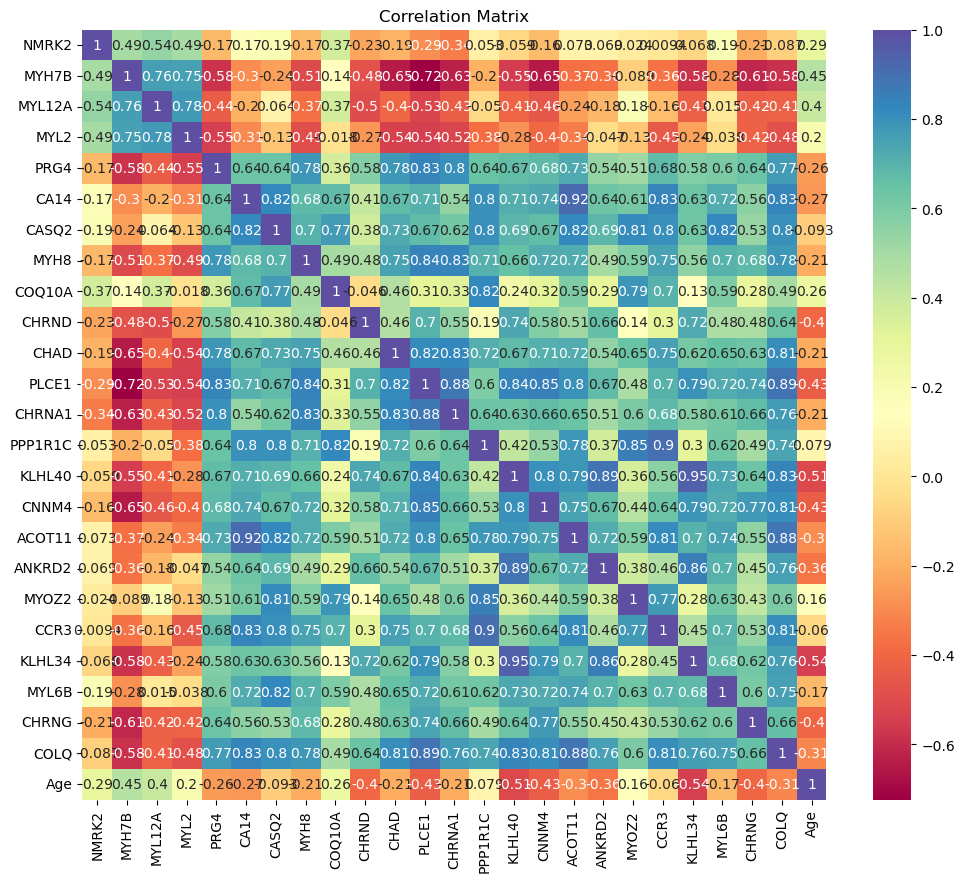

In [45]:
# Correlation matrix
corr = data.corr() 
plt.figure(figsize=(12,10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")

In [46]:
data.shape

(101, 25)

In [47]:
y = data['Age']
x = data.drop('Age', axis = 1)

In [48]:
print(x.shape)
print(y.shape)

(101, 24)
(101,)


In [49]:
y.head()

0    30
1    29
2    30
3    29
4    30
Name: Age, dtype: int64

In [50]:
x.head()

,NMRK2,MYH7B,MYL12A,MYL2,PRG4,CA14,CASQ2,MYH8,COQ10A,CHRND,...,KLHL40,CNNM4,ACOT11,ANKRD2,MYOZ2,CCR3,KLHL34,MYL6B,CHRNG,COLQ
0,-1.200135,-3.619689,-2.572716,-3.060903,-4.954960,-4.185165,-2.957674,-5.626698,-3.799027,-4.615722,...,-2.016805,-2.291814,-4.560831,-4.101038,-2.804252,-5.378016,-4.293191,-3.049944,-4.678245,-1.500795
1,-1.968994,-3.903687,-2.788963,-3.108632,-4.558801,-4.945145,-3.165976,-5.603162,-3.858062,-4.507436,...,-2.356065,-2.580352,-5.088259,-4.487406,-3.042286,-6.614214,-4.581436,-3.659998,-4.692073,-1.910758
2,-1.684898,-3.548174,-2.516009,-3.043248,-4.748317,-4.540110,-2.898011,-4.600830,-3.783796,-4.450070,...,-1.827499,-2.223710,-4.734622,-4.008674,-2.757527,-4.863443,-4.173351,-2.746038,-4.845878,-1.355824
3,-1.935442,-4.310112,-2.913646,-3.202091,-4.405045,-5.343365,-3.169684,-4.051258,-4.121806,-4.034421,...,-2.263483,-2.659686,-5.806058,-4.376045,-3.165185,-6.216622,-4.464892,-3.566889,-4.635311,-1.890636
4,-1.447648,-4.120810,-2.739432,-3.141799,-5.860048,-4.674879,-3.069282,-6.160380,-3.859836,-4.671647,...,-1.964417,-2.342829,-4.769898,-4.596035,-3.021196,-5.635174,-4.191763,-3.322963,-4.817814,-1.550441


In [51]:
#Importing our ML toolkit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,classification_report
from sklearn.svm import SVC
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((80, 24), (21, 24))

In [53]:
accuracy = {}

# (support vector machine, random forest and logistic regression)

In [58]:
model2 = DecisionTreeClassifier(max_depth=100)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(accuracy_score(y_test, y_pred2))
accuracy[str(model2)] = accuracy_score(y_test, y_pred2)*100

0.047619047619047616


In [55]:
y_pred_test = model2.predict(X_test)
y_pred_train = model2.predict(X_train)

test2 = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Actual':y_train,
    'Y train predicted':y_pred_train
})

In [56]:
test2.sample(20)

,Actual,Y test predicted
94,62,70
2,30,25
8,24,32
24,21,24
86,37,31
7,24,25
96,63,42
26,23,57
93,54,31
54,25,58


In [59]:
from sklearn.metrics import confusion_matrix
"""
cm=confusion_matrix(y_test,y_pred2)

conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
#conf_matrix=pd.DataFrame(data=cm,
#                         columns= [16, 21, 19, 35, 23, 15,  9, 20, 28, 18, 31, 17, 24, 14, 34, 30, 22, 26],
#                         index =  [16, 21, 19, 35, 23, 15,  9, 20, 28, 18, 31, 17, 24, 14, 34, 30, 22, 26])

plt.figure(figsize = (15,6))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
"""

'\ncm=confusion_matrix(y_test,y_pred2)\n\nconf_matrix=pd.DataFrame(data=cm,columns=[\'Predicted:0\',\'Predicted:1\'],index=[\'Actual:0\',\'Actual:1\'])\n#conf_matrix=pd.DataFrame(data=cm,\n#                         columns= [16, 21, 19, 35, 23, 15,  9, 20, 28, 18, 31, 17, 24, 14, 34, 30, 22, 26],\n#                         index =  [16, 21, 19, 35, 23, 15,  9, 20, 28, 18, 31, 17, 24, 14, 34, 30, 22, 26])\n\nplt.figure(figsize = (15,6))\nsns.heatmap(conf_matrix, annot=True,fmt=\'d\',cmap="YlGnBu")\n'

In [60]:
model3 = RandomForestClassifier(max_depth=25)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(accuracy_score(y_test, y_pred3))
accuracy[str(model3)] = accuracy_score(y_test, y_pred3)*100

0.047619047619047616


In [61]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

          21       0.50      0.50      0.50         2
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         3
          24       0.00      0.00      0.00         4
          25       0.00      0.00      0.00         2
          27       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         2
          31       0.00      0.00      0.00         0
          37       0.00      0.00      0.00         1
          52       0.00      0.00      0.00         0
          54       0.00      0.00      0.00         1
          60       0.00      0.00      0.00         0
          62       0.00      0.00      0.00         1
          63       0.00      0.00      0.00         1
          72       0.00      0.00      0.00         0
          73       0.00      0.00      0.00         1
          81       0.00    

C:\Users\Engr Saeed\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Engr Saeed\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Engr Saeed\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Engr Saeed\Anaconda3\lib\site-packages\

In [71]:
y_pred_test = model3.predict(X_test)
y_pred_train = model3.predict(X_train)

test3 = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Actual':y_train,
    'Y train predicted':y_pred_train
})

In [72]:
test3.sample(20)

,Actual,Y test predicted
18,0,0
96,0,0
207,0,0
149,0,0
92,1,1
191,1,1
229,1,1
225,0,0
64,1,1
203,0,0


In [106]:
model1 = LogisticRegression(max_iter = 300)
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(accuracy_score(y_test, y_pred1))
accuracy[str(model1)] = accuracy_score(y_test, y_pred1)*100

0.8947368421052632


In [107]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        46
           1       0.92      0.80      0.86        30

    accuracy                           0.89        76
   macro avg       0.90      0.88      0.89        76
weighted avg       0.90      0.89      0.89        76



In [108]:
y_pred_test = model1.predict(X_test)
y_pred_train = model1.predict(X_train)

test1 = pd.DataFrame({
    'Actual':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Actual':y_train,
    'Y train predicted':y_pred_train
})

In [109]:
test1.sample(20)

,Actual,Y test predicted
178,1,1
8,0,0
161,1,1
15,0,0
12,1,1
89,0,1
155,1,1
199,1,1
111,0,0
45,0,0
